In [1]:
import math
math.tanh(-2.2)

-0.9757431300314515

In [4]:
math.tanh(0.1)

0.9800963962661914

In [3]:
math.tanh(2.3)

0.9800963962661914

## Neural Networks

In [5]:
import torch
import torch.optim as optim

In [11]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [12]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [31]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[2.1272],
        [0.8979]], grad_fn=<AddmmBackward>)

In [32]:
linear_model.weight

Parameter containing:
tensor([[0.5488]], requires_grad=True)

In [33]:
linear_model.bias

Parameter containing:
tensor([-0.9625], requires_grad=True)

In [34]:
x = torch.ones(1)
linear_model(x)

tensor([-0.4137], grad_fn=<AddBackward0>)

In [35]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.4137],
        [-0.4137],
        [-0.4137],
        [-0.4137],
        [-0.4137],
        [-0.4137],
        [-0.4137],
        [-0.4137],
        [-0.4137],
        [-0.4137]], grad_fn=<AddmmBackward>)

In [37]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters() , lr = 1e-2)

In [38]:
linear_model.parameters()

<generator object Module.parameters at 0x000001CC7BDB8048>

In [39]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2764]], requires_grad=True),
 Parameter containing:
 tensor([0.7287], requires_grad=True)]

In [41]:
def training_loop(n_epochs , optimizer , model , loss_fn , t_u_train , t_u_val , t_c_train , t_c_val):
    for epoch in range(1, n_epochs + 1): 
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train , t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val , t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [42]:
def loss_fn(t_p , t_c):
    sqr_diff = (t_p - t_c)**2
    return sqr_diff.mean()

In [44]:
linear_model = nn.Linear(1,1)
optimizer =optim.SGD(linear_model.parameters() , lr= 1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 201.5375, Validation loss 60.0436
Epoch 1000, Training loss 3.5399, Validation loss 2.7492
Epoch 2000, Training loss 2.6096, Validation loss 4.4669
Epoch 3000, Training loss 2.5795, Validation loss 4.9130


In [45]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[5.5381]], requires_grad=True)
Parameter containing:
tensor([-18.2248], requires_grad=True)


In [48]:
seq_model = nn.Sequential(
                         nn.Linear(1,13),
                         nn.Tanh(),
                         nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [50]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [52]:
for name, param in seq_model.named_parameters():      
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [53]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [54]:
for name, param in seq_model.named_parameters():      
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [55]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.1860], requires_grad=True)

In [57]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.4458, Validation loss 6.7781
Epoch 1000, Training loss 1.4127, Validation loss 7.4164
Epoch 2000, Training loss 1.3194, Validation loss 7.3581
Epoch 3000, Training loss 1.2862, Validation loss 7.3556
Epoch 4000, Training loss 1.2756, Validation loss 7.3640
Epoch 5000, Training loss 1.2725, Validation loss 7.3931
output tensor([[12.6474],
        [-0.4745]], grad_fn=<AddmmBackward>)
answer tensor([[11.],
        [ 3.]])
hidden tensor([[ 0.0056],
        [-0.0009],
        [-0.0017],
        [ 0.0047],
        [-0.0025],
        [ 0.0013],
        [ 0.0004],
        [-0.0018]])


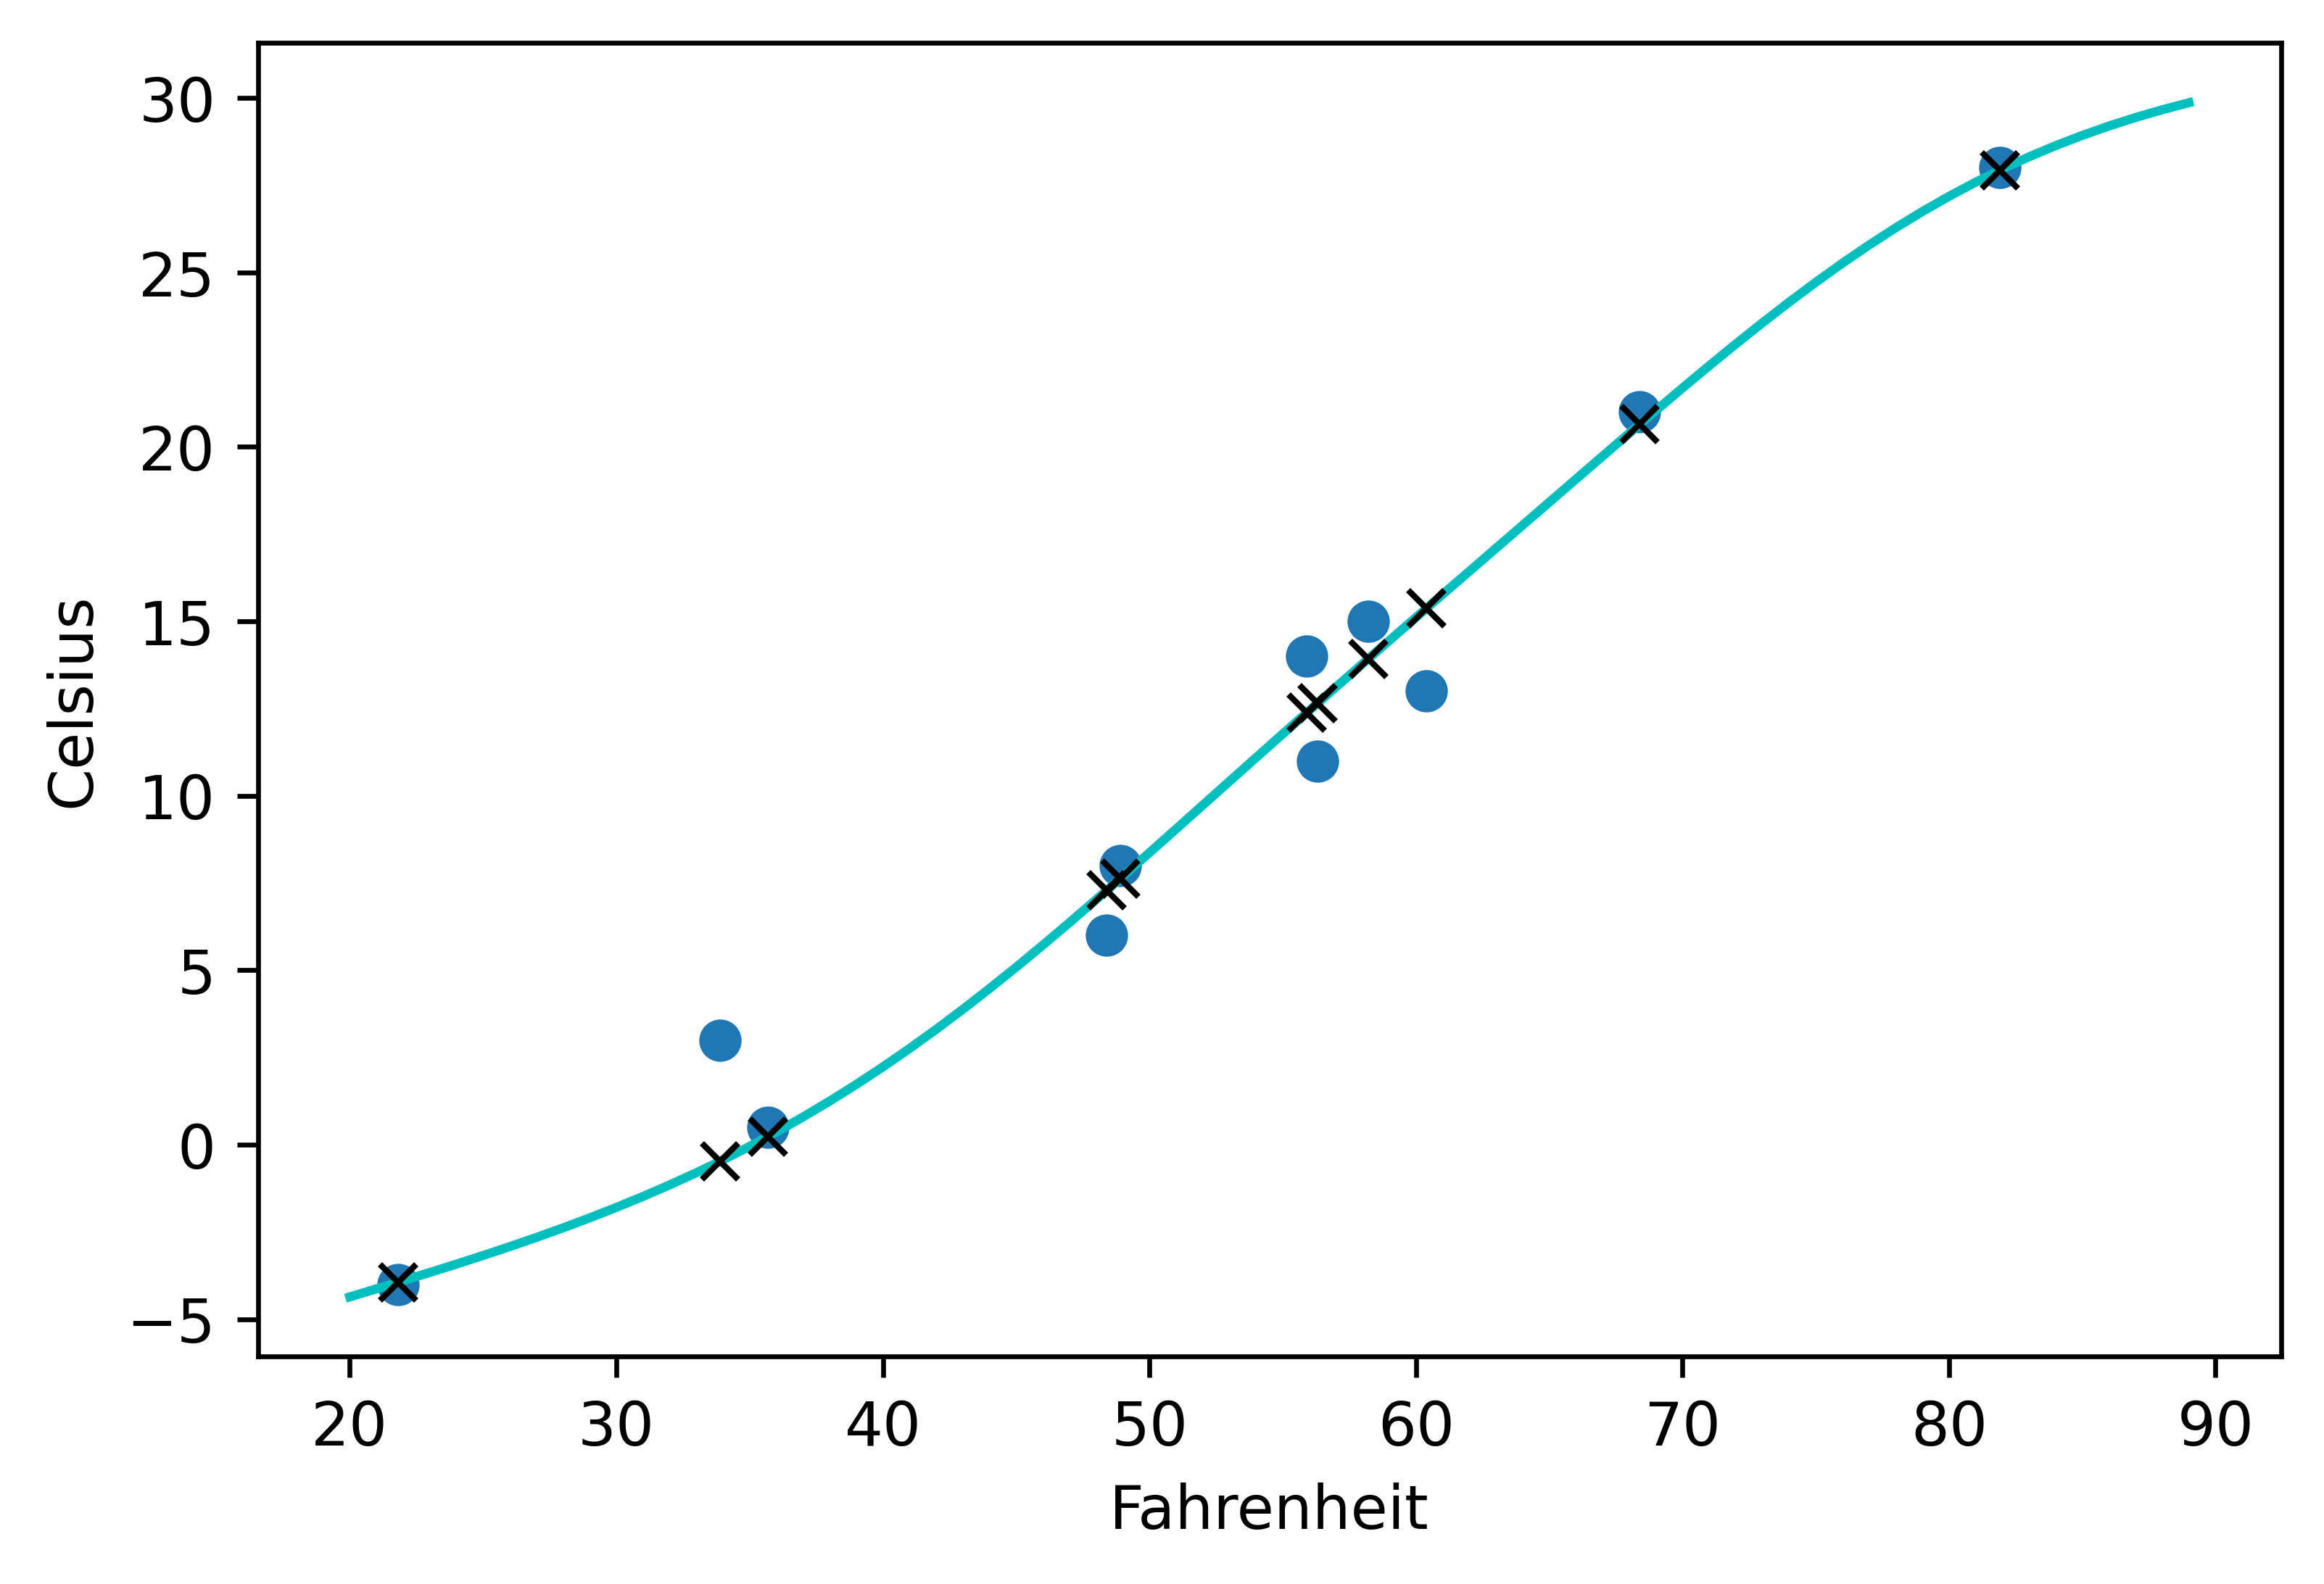

In [58]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
